In [2]:
import pandas as pd
from matplotlib import pyplot as plt
from datetime import date,datetime
from ipywidgets import interact, interact_manual, IntSlider, Checkbox, Dropdown
import numpy as np
import seaborn as sns
import json

In [3]:
data_dir = "release"
semester = list(range(20231002, 20231007)) + list(range(20231011, 20231014)) + \
        list(range(20231016, 20231021)) + list(range(20231030, 20231032)) + \
        list(range(20231101, 20231104)) + list(range(20231106, 20231111)) + \
        list(range(20231113, 20231118)) + list(range(20231120, 20231125)) + \
        list(range(20231127, 20231131)) + list(range(20231201, 20231202)) + \
        list(range(20231204, 20231208)) + list(range(20231211, 20231216))
midterm = list(range(20231023, 20231028))
final   = list(range(20231218, 20231223))
stands = [500101005, 500101007, 500101008, 500101009, 500101010, 500101012, 500101014, 500101016, 500101018, 500101020, 500101021, 500101022, 500101023, 500101024, 500101025, 500101027, 500101028, 500101029, 500101032, 500101033, 500101034, 500101036, 500101037, 500101038, 500101039, 500101040, 500101041, 500101042, 500101093, 500101094, 500101104, 500101181, 500101184, 500101185, 500101191, 500101193, 500101209, 500101216, 500106001, 500106002, 500106003, 500106004, 500106007, 500106090, 500119005, 500119006, 500119007, 500119008,
         500119009, 500119043, 500119044, 500119045, 500119046, 500119047, 500119048, 500119049, 500119050, 500119051, 500119052, 500119053, 500119054, 500119055, 500119056, 500119057, 500119058, 500119059, 500119060, 500119061, 500119062, 500119063, 500119064, 500119065, 500119066, 500119067, 500119068, 500119069, 500119070, 500119071, 500119072, 500119074, 500119075, 500119076, 500119077, 500119078, 500119079, 500119080, 500119081, 500119082, 500119083, 500119084, 500119085, 500119086, 500119087, 500119088, 500119089, 500119090, 500119091]
print(semester)

[20231002, 20231003, 20231004, 20231005, 20231006, 20231011, 20231012, 20231013, 20231016, 20231017, 20231018, 20231019, 20231020, 20231030, 20231031, 20231101, 20231102, 20231103, 20231106, 20231107, 20231108, 20231109, 20231110, 20231113, 20231114, 20231115, 20231116, 20231117, 20231120, 20231121, 20231122, 20231123, 20231124, 20231127, 20231128, 20231129, 20231130, 20231201, 20231204, 20231205, 20231206, 20231207, 20231211, 20231212, 20231213, 20231214, 20231215]


In [ ]:
img = plt.imread("./data/map.png")
HOURMIN, HOURMAX = 0, 23

In [5]:
df = pd.read_parquet("./data/semester.parquet")

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5760620 entries, 0 to 5760619
Data columns (total 6 columns):
 #   Column  Dtype         
---  ------  -----         
 0   time    datetime64[ns]
 1   tot     int64         
 2   sbi     int64         
 3   bemp    int64         
 4   sno     int64         
 5   sbi%    float64       
dtypes: datetime64[ns](1), float64(1), int64(4)
memory usage: 263.7 MB


In [7]:
with open("./data/demographic.json") as file:
    demo = json.load(file)
    demo = pd.DataFrame.from_dict(demo, orient='index').reset_index(names='sno')
    demo['sno'] = demo['sno'].astype(dtype='int')
    demo = demo[['sno', 'sna', 'lat', 'lng']]
    demo = demo[demo['sno'].isin(stands)]

demo

,sno,sna,lat,lng
4,500101005,YouBike2.0_辛亥復興路口西北側,25.02153,121.54299
6,500101007,YouBike2.0_復興南路二段340巷口,25.02253,121.54326
7,500101008,YouBike2.0_新生南路三段52號前,25.02112,121.53407
8,500101009,YouBike2.0_新生南路三段66號前,25.01976,121.53384
9,500101010,YouBike2.0_新生南路三段82號前,25.01894,121.53361
...,...,...,...,...
1321,500119087,YouBike2.0_臺大總圖書館西南側,25.01690,121.54031
1322,500119088,YouBike2.0_臺大黑森林西側,25.01995,121.54347
1323,500119089,YouBike2.0_臺大獸醫館南側,25.01791,121.54242
1324,500119090,YouBike2.0_臺大新體育館東南側,25.02112,121.53591


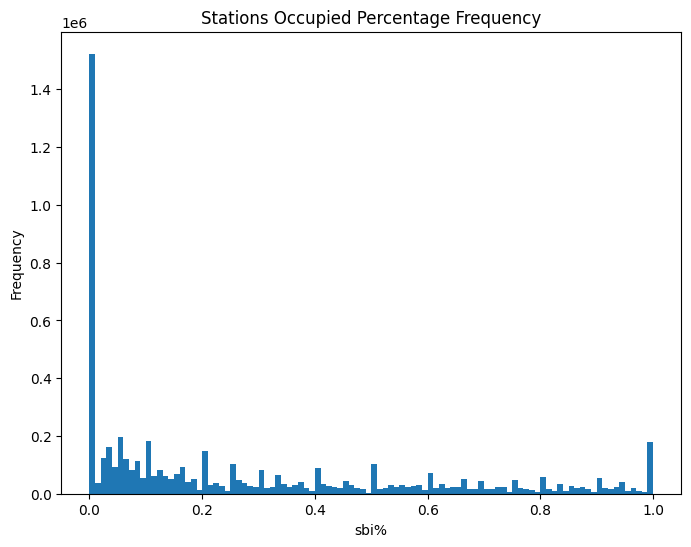

In [8]:
fig,ax = plt.subplots()
df['sbi%'].plot(kind='hist', bins=100,xlabel="sbi%",title='Stations Occupied Percentage Frequency',figsize=(8,6),ax=ax);

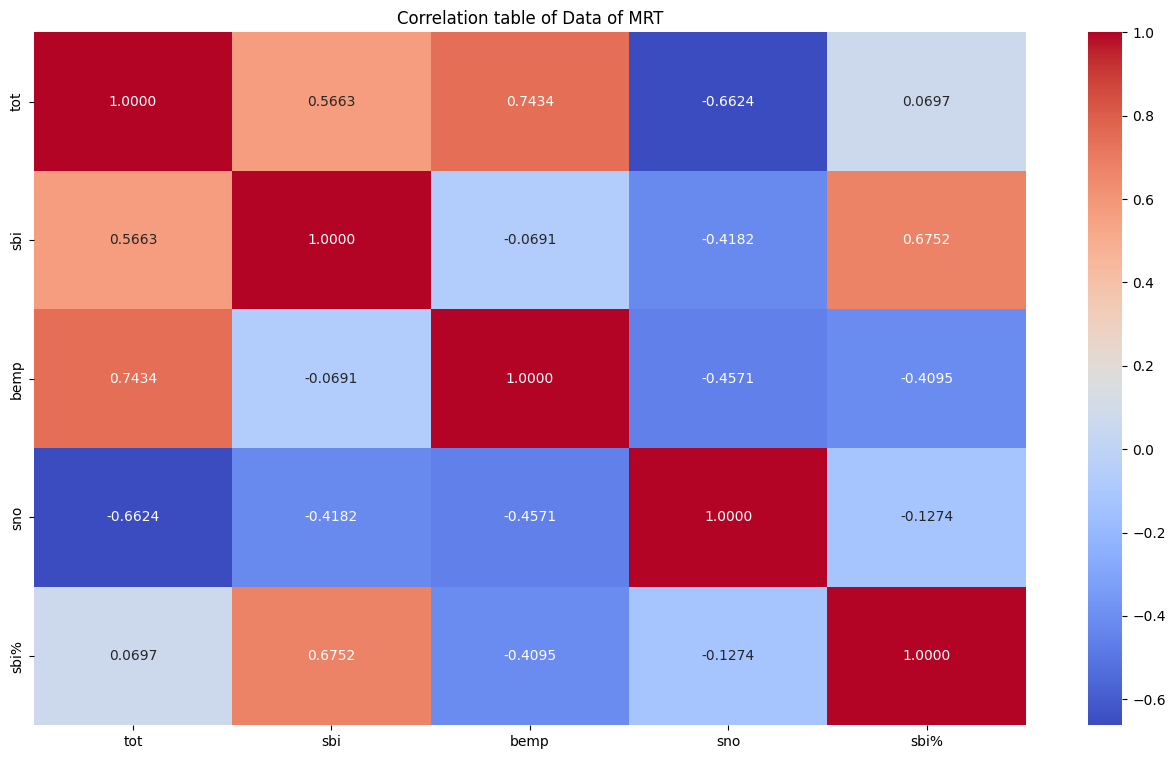

In [9]:
plt.figure(figsize=(16,9))
sns.heatmap(df[df['sno'].isin(demo[demo['sna'].str.contains('捷運', na=False)]['sno'])]
            .drop(columns='time', axis=1).corr(), annot=True, fmt='.4f', cmap=plt.get_cmap('coolwarm')
            )
plt.title("Correlation table of Data of MRT");

### 對其中一些地方，做腳踏車率對時間圖，與腳踏車對時間圖（皆爲上課日）
- 宿舍與捷運站
  - 推測中午的高峰爲吃飯與下午沒課的人群造成的
- 共同與新生
  - 08:00開始攀升，中午下降，下午攀升，15:00後下降 均爲合理情形
- 小福與小小福 
  - 因各自臨近普通與共同，故有被影響，但看得出大致趨勢
- 思亮館（圖一）
  - 因思亮館的課皆爲第2、6、7節開始上課，故常常無空位停車
  - 思亮館周圍較無其他站，故分析效果顯著

In [10]:
def plot_sbi_demo():
  df_temp = df[['sno','time','sbi%','sbi']]
  fig, axes = plt.subplots(1,2)
  df_temp[df_temp['sno'].isin(demo[demo['sna'].str.contains('教室', na=False)]['sno'])]\
    .groupby(df['time'].dt.hour).mean()['sbi%'].plot(ylabel="sbi%", figsize=(20, 7), ylim=(0, 1.1), ax=axes[0], title='Stations Occupied Percentage vs Hour');
  df_temp[df_temp['sno'].isin(demo[demo['sna'].str.contains('小福', na=False)]['sno'])] \
      .groupby(df['time'].dt.hour).mean()['sbi%'].plot(ax=axes[0])
  df_temp[df_temp['sno'].isin(demo[demo['sna'].str.contains('思亮', na=False)]['sno'])] \
      .groupby(df['time'].dt.hour).mean()['sbi%'].plot(ax=axes[0])
  
  axes[0].legend(["GT&XS","XF&XXF","SL"]);
  df_temp[df_temp['sno'].isin(demo[demo['sna'].str.contains('捷運', na=False)]['sno'])] \
      .groupby(df['time'].dt.hour).mean()['sbi%'].plot(ylabel="sbi%", ax=axes[1], title='Stations Occupied Percentage vs Hour', ylim=(0, 1.1))
  df_temp[df_temp['sno'].isin(demo[demo['sna'].str.contains('舍', na=False)]['sno'])] \
      .groupby(df['time'].dt.hour).mean()['sbi%'].plot(ax=axes[1])
  axes[1].legend(["MRT","Dorm"]);

interact(plot_sbi_demo);

interactive(children=(Output(),), _dom_classes=('widget-interact',))

### 以地圖的方式呈現
- 拉動時間軸可明顯看出趨勢
    - 早上往右上方移動，下午往左下方移動
    - 早晚較不集中，下午較集中
- 假日趨勢則較不明顯

In [11]:
def plot_distribution(hr):
  fig, axes = plt.subplots()
  # fig, axes = plt.subplots(1, 2)
  df_temp = df[df['time'].dt.hour==hr].groupby(['sno']).mean().reset_index()[['sno','sbi%','sbi']]
  df_temp = pd.merge(df_temp, demo, on='sno', how='inner')
  df_temp.plot(kind='scatter',x='lng',y='lat',c='sbi%',s=40,colorbar=True,colormap='PuOr',vmin=0,vmax=1,title=f'Stations Occupied Percentage (hr={hr})',ax=axes,figsize=(16,9));
  # df_temp.plot(kind='scatter',x='lng',y='lat',c='sbi%',s=40,colorbar=True,colormap='plasma_r',vmin=0,vmax=1,title=f'Stations Occupied Percentage (hr={hr})',ax=axes[0],figsize=(16,9));
  axes.imshow(img, extent=[121.52855, 121.546, 25.011792, 25.023299])
  # axes[0].imshow(img, extent=[121.52855, 121.546, 25.011792, 25.023299])
  # df_temp.plot(kind='scatter', x='lng', y='lat', c='sbi', s=40, colorbar=True,colormap='plasma_r', vmin=0, vmax=40, title=f'Bikes in Stations (hr={hr})', ax=axes[1])
  # axes[1].imshow(img, extent=[121.52855,121.546,25.011792,25.023299])
  plt.savefig(f'outputs/{hr}.png')


# for i in range(HOURMIN,HOURMAX+1):
#   plot_distribution(i)
interact(plot_distribution, hr=IntSlider(8,min=HOURMIN,max=HOURMAX,step=1));

interactive(children=(IntSlider(value=8, description='hr', max=23), Output()), _dom_classes=('widget-interact'…

In [12]:
def plot_center(errorbar=True):
  df_temp = pd.merge(df, demo, on='sno', how='inner')
  df_temp = pd.DataFrame(np.repeat(df_temp[['time', 'lat', 'lng']].to_numpy(), df_temp['sbi'].to_numpy(), axis=0), columns=['time_renamed', 'lat', 'lng']) \
      .groupby(df['time'].dt.hour).mean().reset_index()
  fig,ax = plt.subplots()
  if errorbar == True:
    df_temp.plot(kind='scatter',x='lng',y='lat',c='time',s=40,colormap='twilight',figsize=(24,7),ax=ax,title=f'Center of Bikes',yerr=df_temp.std()['lat'],xerr=df_temp.std()['lng']);
  else:
    df_temp.plot(kind='scatter',x='lng',y='lat',c='time',s=40,colormap='twilight',figsize=(24,7),ax=ax,title=f'Center of Bikes');
  ax.imshow(img, extent=[121.52855,121.546, 25.011792,25.023299]);
interact(plot_center,errorbar=IntSlider(1,min=0,max=1,step=1));

interactive(children=(IntSlider(value=1, description='errorbar', max=1), Output()), _dom_classes=('widget-inte…

### 未來展望（？
- 需要實際借還數資料，不然只看得出淨變化，且會忽略工作人員影響等
- 天氣（溫度、溼度、降雨、風速、壓力）
- 機器學習預測